# IDEA: 
Best Place to live as a pidgeon

# Metric: 
Number of Public Wifi Locations
Because birds arn't real, They are govement drones.
www.birdsarntreal.com

In [1]:
import pandas as pd
wifi = pd.read_csv("pub-wifi.csv",low_memory=False)
zip = pd.read_csv("zip.csv",low_memory=False)
pitt_zip = pd.read_csv("pitt_zip.csv",low_memory=False)

In [2]:
# Create the zip dictionary
zip_dict = {}
for index, row in zip.iterrows():
    number = row['zip']
    name = row['name']
    zip_dict[number] = name

In [3]:
# Add missing names to dictionary
for index, row in pitt_zip.iterrows():
    number = row['Zip'] 
    name = row['Name']
    zip_dict[number] = name

In [4]:
# Create dictionary of zipcodes and their associated count
wifi_count = {}
for index, row in wifi.iterrows():
    try:
        zip = int(row['zip'])
        # Get Name from Zip
        name = zip_dict[zip]
    
        if name is not None:
            if name not in wifi_count:
                wifi_count[name] = 1
            else:
                wifi_count[name] += 1   
    except:
        pass # Some entries have no zipcode

In [5]:
# Output
sorted = {k:v for k,v in sorted(wifi_count.items(), key=lambda v:v[1], reverse=True)}
count = 10
for item in sorted.items():
    print(item)
    if count == 0:
        break
    else:
      count -= 1

('PITTSBURGH', 47)
('BRADDOCK', 18)
('SHARPSBURG', 8)
('OAKLAND', 5)
('PENN HILLS', 5)
('SOUTH HILLS', 4)
('BROOKLINE', 4)
('SQUIRREL HILL', 3)
('BRENTWOOD', 3)
('WILKINSBURG', 3)
('ALLEGHENY', 2)


# Conclusion:

The city has the most wifi spots
This data is probably skewed because of teh zip code translation, a lot of zip codes are generalized to pittsburgh
But I feel Confident that there is also a lot of buisnesses and institutes that have wifi.

I am suprirsed by braddock also having many more spots, compared to all the rest being so low.
I dont know that area so I cant make any assumtions about it.

In [6]:
# geopandas for drawing a maop
import geopandas
%matplotlib inline
wifi_count =  {k.lower(): v for k, v in wifi_count.items()}
s = pd.Series(wifi_count, name='count')
s.index.name = 'neighborhood'
s.reset_index()

,neighborhood,count
0,allegheny,2
1,south hills,4
2,brookline,4
3,pittsburgh,47
4,oakland,5
5,squirrel hill,3
6,wabash,2
7,natrona heights,1
8,carnegie,2
9,bethel park,1


<Axes: >

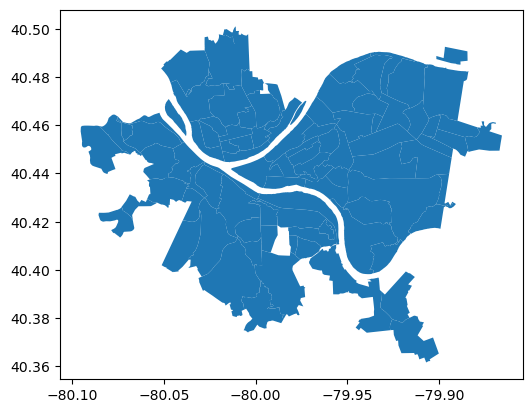

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods['hood'] = neighborhoods['hood'].str.lower()
neighborhoods.plot() # plot the geopandas dataframe

In [8]:
# do the merge
count_map = neighborhoods.merge(s, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
count_map[['hood','count','geometry']].head()
# There seems to be an issue with the merge
# I can see that my data has only Oakland while the map has central, north, and west this is part of the issue

,hood,count,geometry
0,central oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,north oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,west oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,crawford-roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,strip district,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<Axes: >

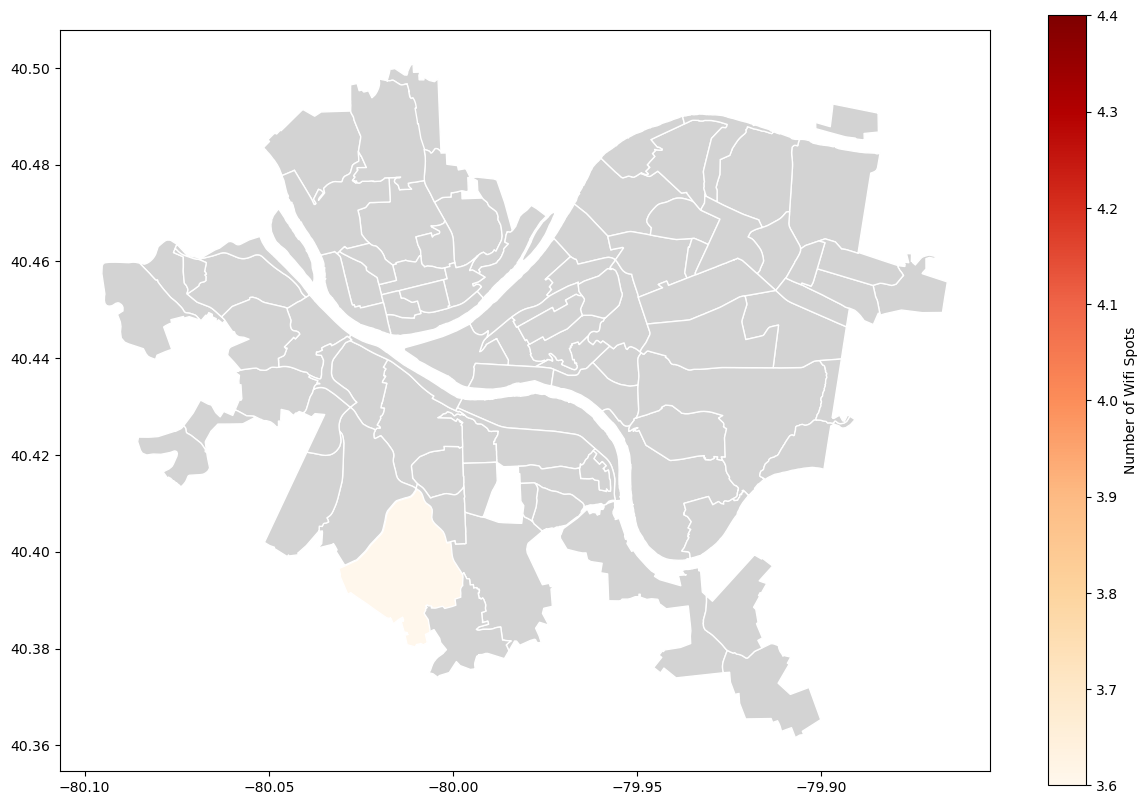

In [9]:
count_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Wifi Spots"}, # label the legend
               figsize=(15, 10),         # set the  size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )